# **Netflix is an application that keeps growing bigger and faster with its popularity, shows and content. This is an EDA or a story telling through its data along with a content-based recommendation system and a wide range of different graphs and visuals.**

Please Upvote if you like the notebook 😀and share possible improvements in the comments.

![](https://media.giphy.com/media/oenruB2DKC7p6/giphy.gif)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
  #  for filename in filenames:
   #     print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
#!git clone https://github.com/Kaggle/docker-python.git

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


# Loading the dataset

In [3]:
#!pip install fsspec

In [40]:
cars=pd.read_csv("https://raw.githubusercontent.com/dnzengou/my-green-recommender/main/data/CO2%20Emissions_Canada.csv")

In [41]:
cars.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [42]:
cars.shape

(7385, 12)

Therefore, it is clear that the dataset contains 12 columns for exploratory analysis.

In [43]:
cars.count()

Make                                7385
Model                               7385
Vehicle Class                       7385
Engine Size(L)                      7385
Cylinders                           7385
Transmission                        7385
Fuel Type                           7385
Fuel Consumption City (L/100 km)    7385
Fuel Consumption Hwy (L/100 km)     7385
Fuel Consumption Comb (L/100 km)    7385
Fuel Consumption Comb (mpg)         7385
CO2 Emissions(g/km)                 7385
dtype: int64

In [44]:
cars['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [45]:
cars['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

Fuel type: X = Regular gasoline; Z = Premium gasoline; D = Diesel; E = E85; N = Natural gas (B = Electricity)

In [46]:
cars['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [47]:
cars['Engine Size(L)'].unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 1.8, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2,
       6. , 6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4, 2.3, 2.8, 0.9, 2.9, 8. , 2.2])

In [48]:
cars['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [49]:
cars_z=cars[cars['Fuel Type']=='Z']


In [50]:
cars_d=cars[cars['Fuel Type']=='D']

In [51]:
cars_x=cars[cars['Fuel Type']=='X']

In [52]:
cars_e=cars[cars['Fuel Type']=='E']

In [53]:
cars_n=cars[cars['Fuel Type']=='N']

# Analysis of Electric (Z) Premium gasoline vs (D) Diesel vs (X) Regular gasoline vs (E) E85 vs (N) Natural gas vehicles.

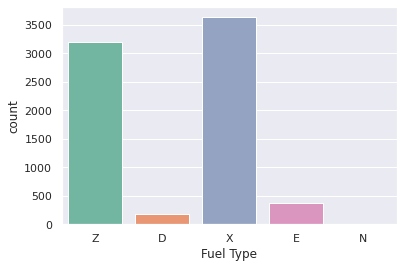

In [54]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Fuel Type", data=cars, palette="Set2")

It is evident that there are more regular gasoline than electrical vehicles.

# Vehicle by class

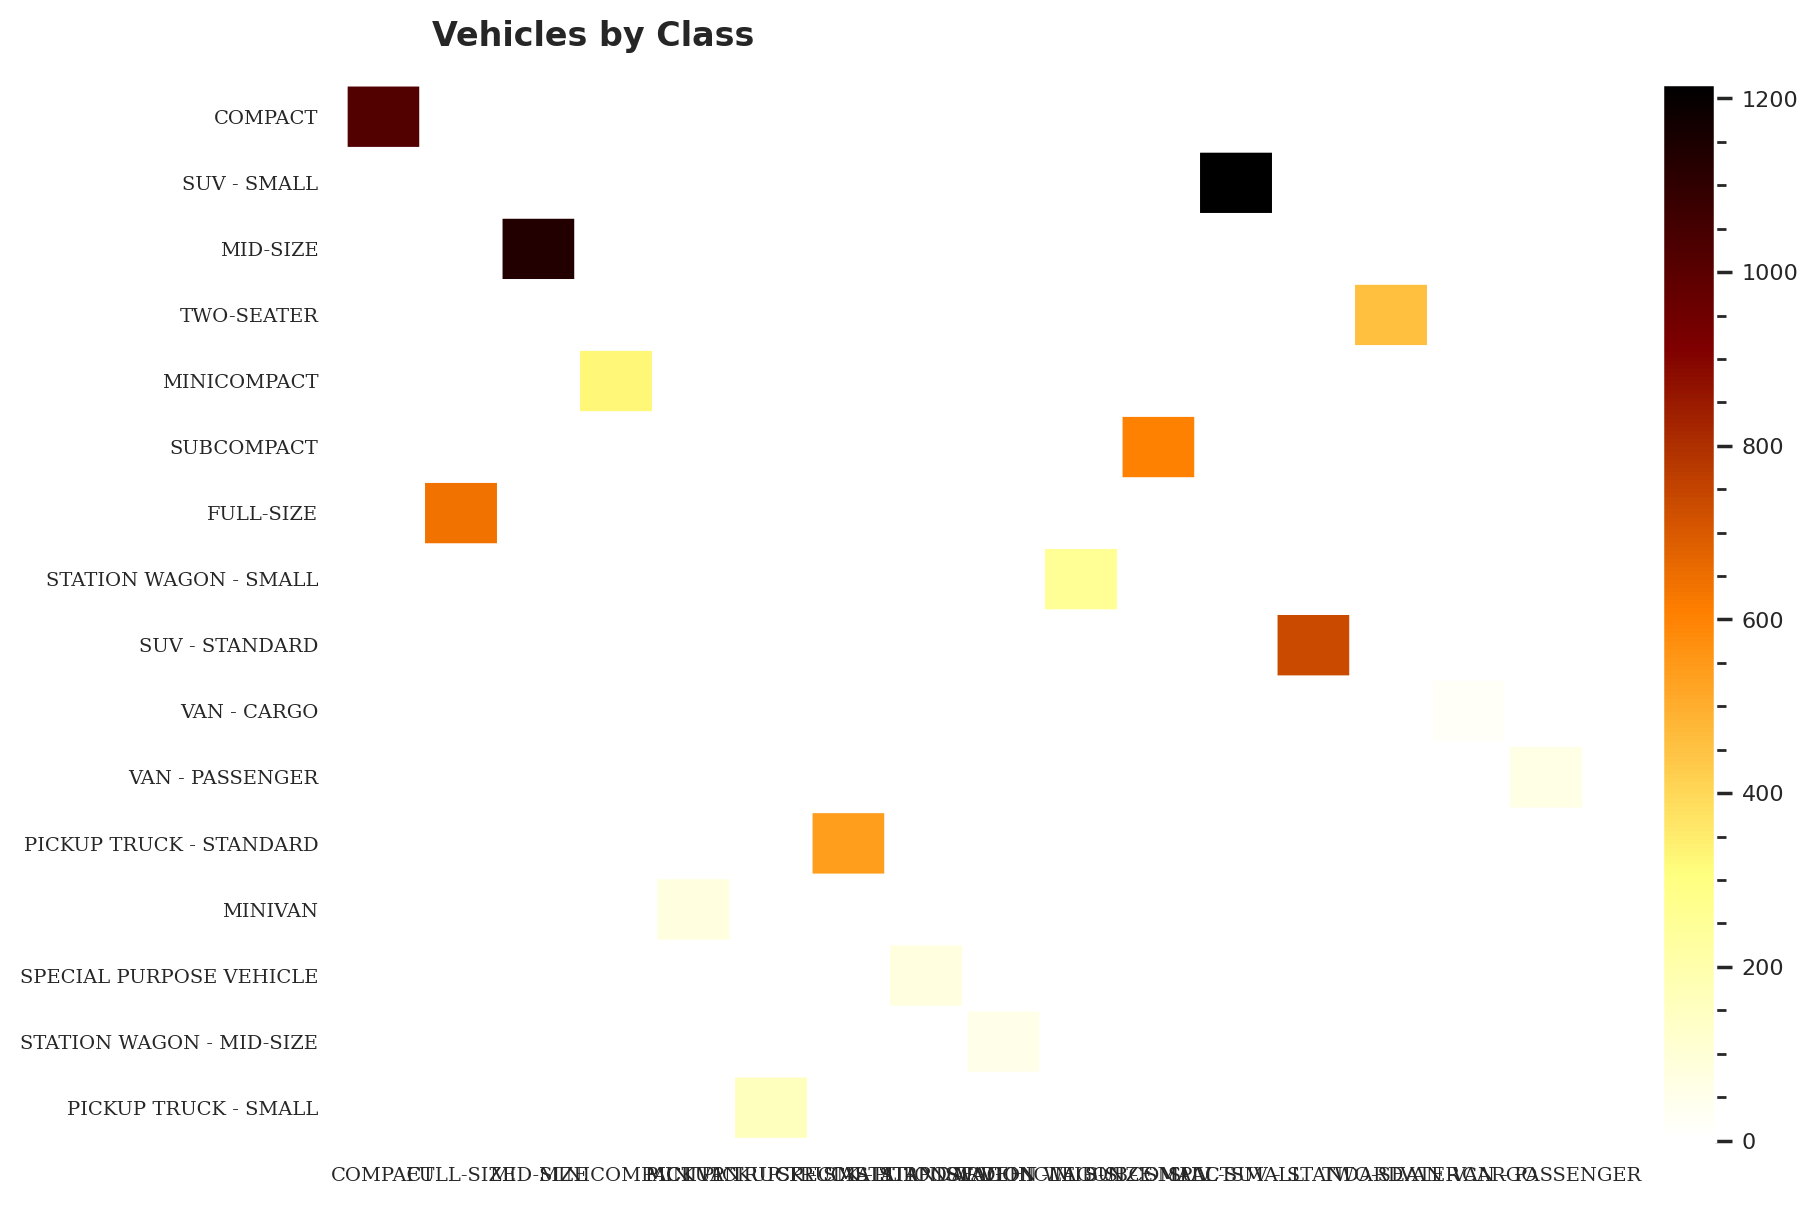

In [55]:
cars_class = cars[['Vehicle Class']].dropna()
#cars_date['year'] = cars_date['CO2 Emissions(g/km)'].apply(lambda x : x.split(', ')[-1])
#cars_date['month'] = cars_date['CO2 Emissions(g/km)'].apply(lambda x : x.lstrip().split(' ')[0])

vehicle_class = ['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'][::-1]
df = cars_class.groupby('Vehicle Class')['Vehicle Class'].value_counts().unstack().fillna(0)[vehicle_class].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Vehicles by Class', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

# CO2 emissions by fuel type

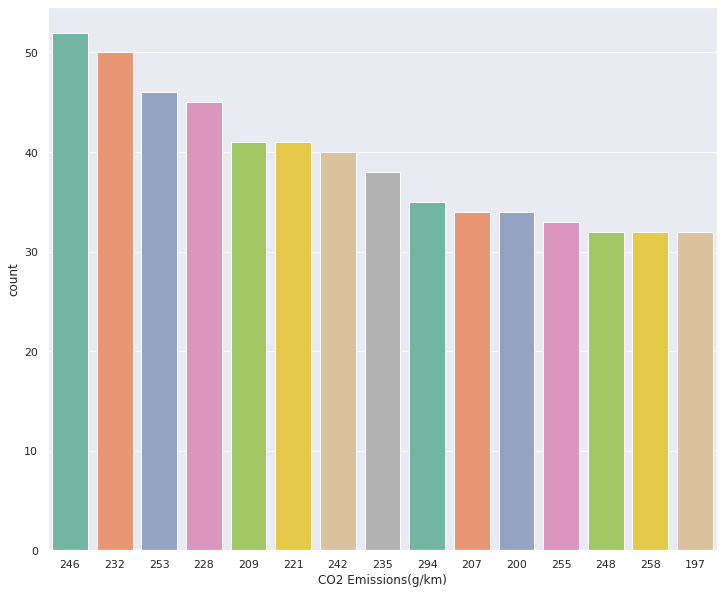

In [56]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="CO2 Emissions(g/km)", data=cars_z, palette="Set2", order=cars_z['CO2 Emissions(g/km)'].value_counts().index[0:15])

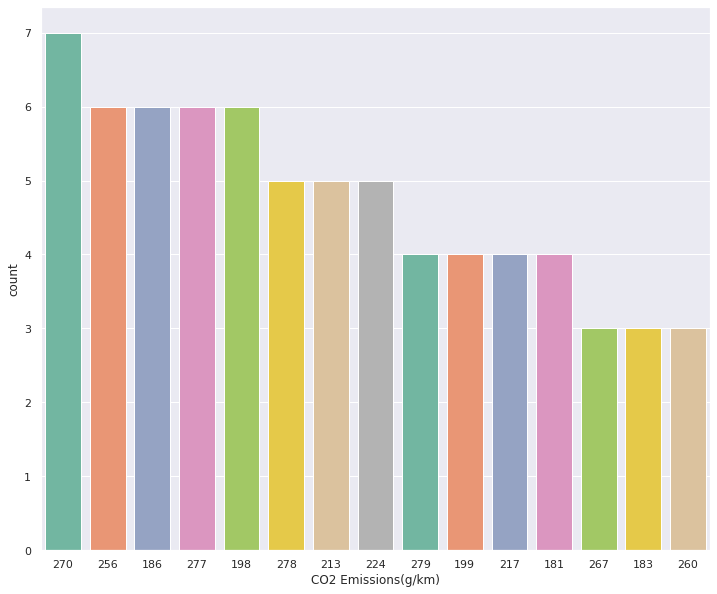

In [57]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="CO2 Emissions(g/km)", data=cars_d, palette="Set2", order=cars_d['CO2 Emissions(g/km)'].value_counts().index[0:15])

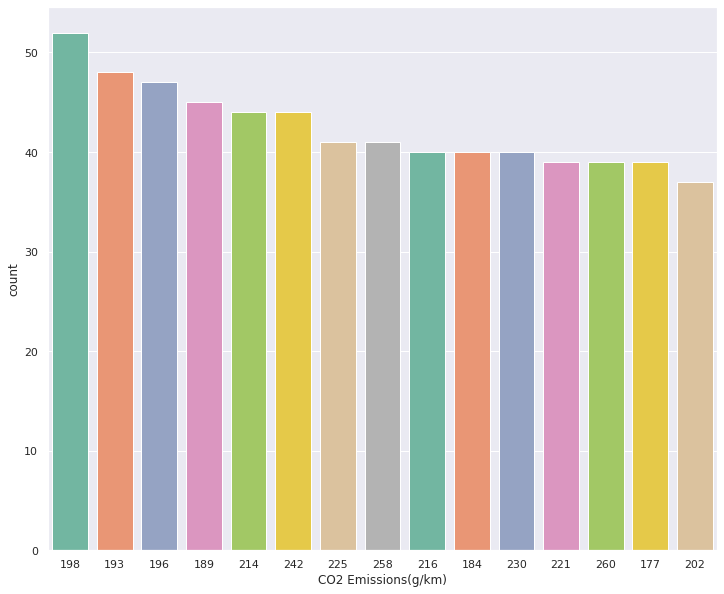

In [58]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="CO2 Emissions(g/km)", data=cars_x, palette="Set2", order=cars_x['CO2 Emissions(g/km)'].value_counts().index[0:15])

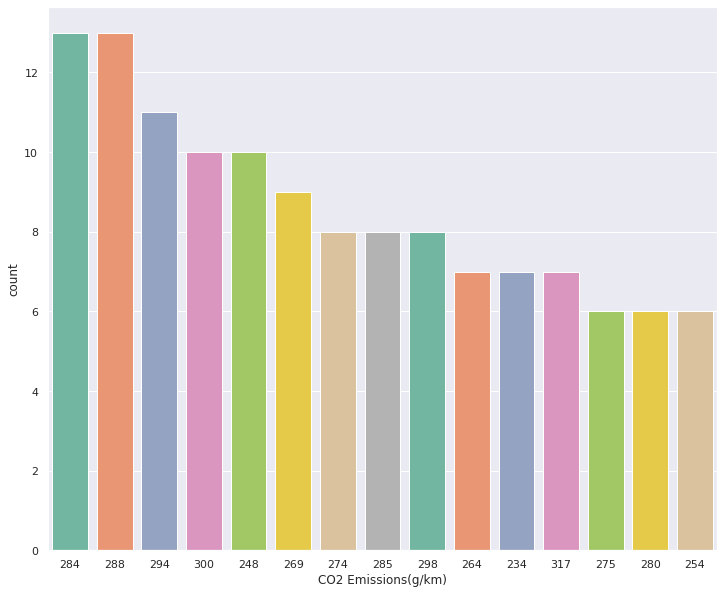

In [59]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="CO2 Emissions(g/km)", data=cars_e, palette="Set2", order=cars_e['CO2 Emissions(g/km)'].value_counts().index[0:15])

# Analysing IMDB ratings to get top rated movies on Netflix

In [ ]:
imdb_ratings=pd.read_csv('/kaggle/input/imdb-extensive-dataset/IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('/kaggle/input/imdb-extensive-dataset/IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(81269, 4)

Performing inner join on the ratings dataset and netflix dataset to get the content that has both ratings on IMDB and are available on Netflix.

In [66]:
cars_clean=cars.dropna()

In [67]:
cars_clean.shape

(7385, 12)

Countries with highest rated content.

# WordCloud for Genres.

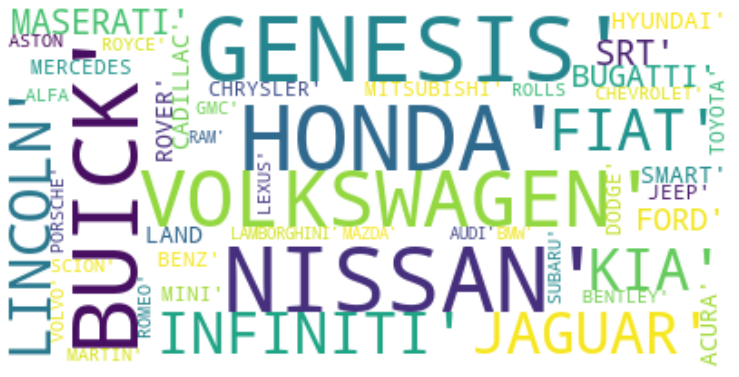

In [69]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(cars['Make']))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# Recommendation System (Content Based)

[inspiration](https://colab.research.google.com/drive/12evSs_vnEMblJkzDNyL1oAmz8LgerDzy#scrollTo=pEjAoY5rkOgK)

# Content based filtering on multiple metrics